In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_p = pd.read_csv('Clusters_Productos_KM.csv')
df_p

,Producto,KG,Precio_Unit_Venta,Ganancia_USD,Ganancia_MXN,Costo_Unit_Manufactura,lbs,Costo_Tot_Manufactura,pca1,pca2,cluster
0,1,50.0,178.13,468.00,8906.37,82.93,110.2250,4146.69,-0.771567,0.162418,0
1,2,200.0,147.37,1506.00,29474.98,64.86,440.9000,12972.60,-0.768883,0.166802,0
2,3,1848.0,1268.24,23464.50,282762.22,930.56,4073.9160,191058.11,-0.652545,0.102661,0
3,4,14471.0,2443.20,131541.39,2538009.49,2186.40,31901.3195,2260669.81,-0.062752,0.240804,0
4,5,33600.0,8119.64,256368.00,4957304.84,6299.00,74071.2000,4036627.33,0.796445,0.109035,0
...,...,...,...,...,...,...,...,...,...,...,...
223,233,3350.0,8321.58,37365.25,718760.51,2644.79,7385.0750,243813.53,-0.363477,-0.234227,0
224,234,7150.0,2156.53,39968.50,772638.51,1355.93,15762.1750,597091.31,-0.482179,0.128652,0
225,235,1475.0,12369.12,32107.50,618307.58,6558.39,3251.6375,333304.56,-0.141393,-0.622533,0
226,236,26600.0,1681.69,268948.00,2091619.68,1648.92,58639.7000,2088499.00,0.015785,0.391204,0


In [3]:
df_p.dtypes

Producto                    int64
KG                        float64
Precio_Unit_Venta         float64
Ganancia_USD              float64
Ganancia_MXN              float64
Costo_Unit_Manufactura    float64
lbs                       float64
Costo_Tot_Manufactura     float64
pca1                      float64
pca2                      float64
cluster                     int64
dtype: object

In [4]:
df_p.groupby('cluster')[['KG','Ganancia_MXN']].describe().T.round(2)

cluster                      0            1           2            3
KG           count      207.00         3.00         1.0        17.00
             mean      4102.14    168127.67    898411.0    101377.82
             std      10235.87     42723.85         NaN    104187.26
             min         19.00    122853.00    898411.0      1250.00
             25%        177.00    148324.00    898411.0     48872.00
             50%        525.00    173795.00    898411.0     80575.00
             75%       2436.00    190765.00    898411.0    134329.00
             max      75409.00    207735.00    898411.0    464625.00
Ganancia_MXN count      207.00         3.00         1.0        17.00
             mean    547570.29  27904442.45  62280388.5  11278890.17
             std    1188863.92   5611027.43         NaN   8969408.20
             min          0.00  21451897.25  62280388.5   3563037.87
             25%      31554.35  26037769.12  62280388.5   6228919.44
             50%     115986.54  30623640.99  62280388.5   7699947.92
             75%     522097.38  31130715.05  62280388.5  12802802.24
             max    8018715.64  31637789.11  62280388.5  34662550.35

In [5]:
df_p.groupby('cluster')[['Precio_Unit_Venta','Costo_Unit_Manufactura']].describe().T.round(2)

cluster                              0          1         2         3
Precio_Unit_Venta      count    207.00       3.00      1.00     17.00
                       mean    2615.40   98959.55  25995.48  22389.86
                       std     3408.48   29696.20       NaN  19415.10
                       min        0.00   78975.30  25995.48   1471.29
                       25%      354.48   81897.66  25995.48   4337.87
                       50%     1208.66   84820.02  25995.48  17710.60
                       75%     3993.91  108951.67  25995.48  37193.29
                       max    20271.77  133083.33  25995.48  62238.28
Costo_Unit_Manufactura count    207.00       3.00      1.00     17.00
                       mean    1712.29   65180.64  18372.01  14354.94
                       std     2217.40   17538.59       NaN  14342.47
                       min       31.17   48693.25  18372.01     51.70
                       25%      215.95   55966.47  18372.01   2112.65
                       50%      747.99   63239.70  18372.01   7862.93
                       75%     2287.82   73424.33  18372.01  24107.95
                       max    11779.59   83608.96  18372.01  42831.12

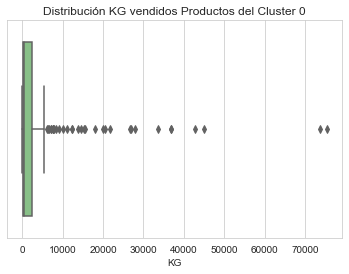

In [6]:
df_c0= df_p.drop(df_p[df_p['cluster'] != 0].index)
df_c0 = df_c0.reset_index(drop=True)

box_c0_KG = sns.boxplot(x = df_c0['KG'], palette = "Accent")
box_c0_KG.set(xlabel = 'KG', title = 'Distribución KG vendidos Productos del Cluster 0');

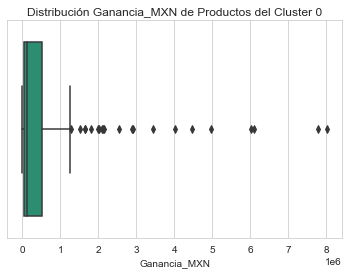

In [7]:
box_c0_GMXN = sns.boxplot(x = df_c0['Ganancia_MXN'], palette = "Dark2")
box_c0_GMXN.set(xlabel = 'Ganancia_MXN', title = 'Distribución Ganancia_MXN de Productos del Cluster 0');

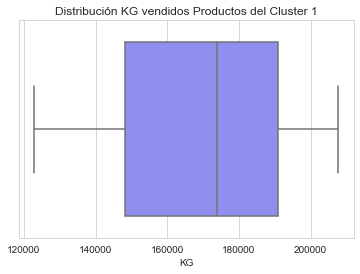

In [8]:
df_c1= df_p.drop(df_p[df_p['cluster'] != 1].index)
df_c1 = df_c1.reset_index(drop=True)
#df_c1_no_outlyer_KG = df_c1[df_c1['KG'] < 200000]

box_c1_KG = sns.boxplot(x = df_c1['KG'], palette = "cool")
box_c1_KG.set(xlabel = 'KG', title = 'Distribución KG vendidos Productos del Cluster 1');

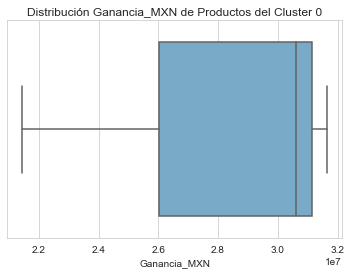

In [9]:
#df_c1_no_outlyer_GMXN = df_c1[df_c1['Ganancia_MXN'] < 20000000]
box_c1_GMXN = sns.boxplot(x = df_c1['Ganancia_MXN'], palette = "Blues_r")
box_c1_GMXN.set(xlabel = 'Ganancia_MXN', title = 'Distribución Ganancia_MXN de Productos del Cluster 0');

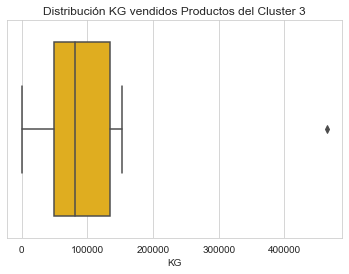

In [10]:
df_c3= df_p.drop(df_p[df_p['cluster'] != 3].index)
df_c3 = df_c3.reset_index(drop=True)
#df_c3_no_outlyer_KG = df_c3[df_c3['KG'] < 70000]

box_c3_KG = sns.boxplot(x = df_c3['KG'], palette = "Wistia")
box_c3_KG.set(xlabel = 'KG', title = 'Distribución KG vendidos Productos del Cluster 3');

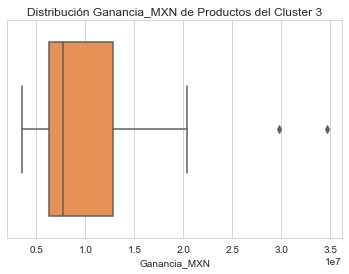

In [11]:
#df_c3_no_outlyer_GMXN = df_c3[df_c3['Ganancia_MXN'] < 20000000]
box_c3_GMXN = sns.boxplot(x = df_c3['Ganancia_MXN'], palette = "Oranges")
box_c3_GMXN.set(xlabel = 'Ganancia_MXN', title = 'Distribución Ganancia_MXN de Productos del Cluster 3');

In [12]:
df_0 = df_p[df_p['cluster'] == 0]
df_0 = df_0.reset_index(drop=True)
df_0 = df_0[['cluster','Producto']]
df_0

,cluster,Producto
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
202,0,233
203,0,234
204,0,235
205,0,236


In [13]:
df_1 = df_p[df_p['cluster'] == 1]
df_1 = df_1.reset_index(drop=True)
df_1 = df_1[['cluster','Producto']]
df_1

,cluster,Producto
0,1,107
1,1,133
2,1,140


In [14]:
df_2 = df_p[df_p['cluster'] == 2]
df_2 = df_2.reset_index(drop=True)
df_2 = df_2[['cluster','Producto']]
df_2

,cluster,Producto
0,2,219


In [15]:
df_3 = df_p[df_p['cluster'] == 3]
df_3 = df_3.reset_index(drop=True)
df_3 = df_3[['cluster','Producto']]
df_3

,cluster,Producto
0,3,18
1,3,47
2,3,58
3,3,100
4,3,102
5,3,112
6,3,117
7,3,118
8,3,125
9,3,126


#### Gráfica de Porcentajes

(228,)
   y_variable  percentage_count
3           2          0.004386
2           1          0.013158
1           3          0.074561
0           0          0.907895


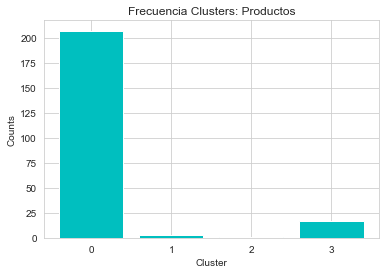

In [38]:
y = df_p['cluster']
print(y.shape)
print(y.value_counts(normalize = True)
      .reset_index().rename(columns = {'index': 'y_variable', 'cluster': 'percentage_count'})
      .sort_values(by = "percentage_count"))
labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "c")
plt.title("Frecuencia Clusters: Productos")
plt.xlabel("Cluster")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

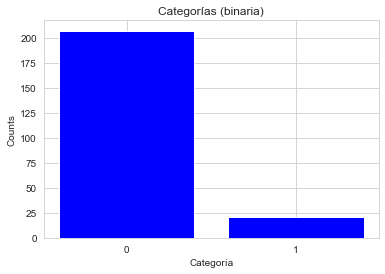

In [18]:
y_binary = np.where(y !=0 , 1, 0 ) # Esta será nuestra nueva variable objetivo.
# Ahora pasamos de un problema de clasificación múltiple a un problema de clasificación binario.

labels, counts = np.unique(y_binary, return_counts=True)
plt.bar(labels, counts, align='center', color = "b")
plt.title("Categorías (binaria)")
plt.xlabel("Categoría")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

In [19]:
df_p_dropped = df_p.drop(columns = ['cluster', 'Producto','pca1','pca2'], axis = 1)

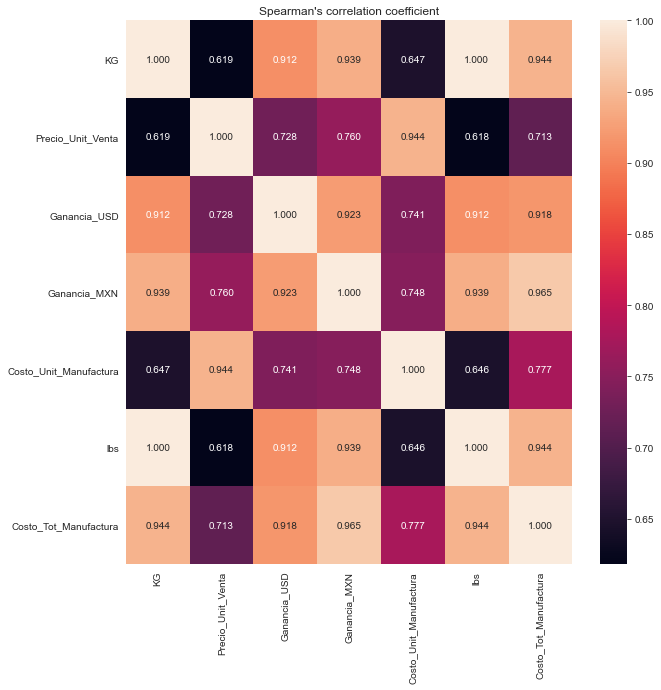

In [20]:
corr_spearman = df_p_dropped.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [22]:
X = df_p_dropped
print(X.shape)
print(X.describe().T.round(2))

(228, 7)
                        count        mean         std      min       25%  \
KG                      228.0    17435.79    72699.47    19.00    200.00   
Precio_Unit_Venta       228.0     5460.04    13824.56     0.00    397.72   
Ganancia_USD            228.0   278316.79  1363069.49     0.00   2636.50   
Ganancia_MXN            228.0  1978429.38  6362199.48     0.00  39233.53   
Costo_Unit_Manufactura  228.0     3563.12     9201.08    31.17    225.68   
lbs                     228.0    38437.19   160265.99    41.89    440.90   
Costo_Tot_Manufactura   228.0  1324034.78  4340083.64  1396.60  23957.06   

                              50%        75%          max  
KG                         812.50    4737.75    898411.00  
Precio_Unit_Venta         1394.74    4866.06    133083.33  
Ganancia_USD              9452.50   45935.02  17583173.20  
Ganancia_MXN            150572.23  724023.06  62280388.50  
Costo_Unit_Manufactura     950.08    3098.10     83608.96  
lbs                   

In [23]:
pt = PowerTransformer()
X_scaled = pt.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%   max
0  228.0   0.0  1.0 -2.48 -0.77  0.01  0.78  2.16
1  228.0  -0.0  1.0 -3.39 -0.71 -0.03  0.71  2.93
2  228.0   0.0  1.0 -4.04 -0.66 -0.14  0.51  2.87
3  228.0  -0.0  1.0 -3.99 -0.69 -0.13  0.55  2.81
4  228.0  -0.0  1.0 -2.17 -0.82  0.08  0.78  2.49
5  228.0  -0.0  1.0 -2.49 -0.77  0.01  0.78  2.16
6  228.0   0.0  1.0 -2.49 -0.76 -0.06  0.73  2.30


### Aprendizaje Supervisado

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size = 0.25, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 171
y_train shape: 171
X_test shape:57
y_test shape:57


In [25]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc.round(2))+"%")
    print("Sensibilidad:"+str(sen.round(2))+"%")
    print("Especificidad:"+str(spec.round(2))+"%")

In [26]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier() #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
y_pred_knn = KNN.predict(X_test)   #Genera la predicción
evaluar(y_test, y_pred_knn)

[[53  0]
 [ 1  3]]
True positives: 3
True negatives: 53
False positives: 0
False negative: 1
Precision:98.25%
Sensibilidad:75.0%
Especificidad:100.0%


In [27]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.98


In [28]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_nb)

[[50  3]
 [ 1  3]]
True positives: 3
True negatives: 50
False positives: 3
False negative: 1
Precision:92.98%
Sensibilidad:75.0%
Especificidad:94.34%


In [29]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.96
Precisión del modelo en el subconjunto de prueba: 0.93


In [30]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_lr)

[[53  0]
 [ 1  3]]
True positives: 3
True negatives: 53
False positives: 0
False negative: 1
Precision:98.25%
Sensibilidad:75.0%
Especificidad:100.0%


In [31]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.98


In [32]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train) #Entrena el modelo
y_pred_svc = SVC.predict(X_test) #Genera la predición
evaluar(y_test, y_pred_svc)

[[53  0]
 [ 1  3]]
True positives: 3
True negatives: 53
False positives: 0
False negative: 1
Precision:98.25%
Sensibilidad:75.0%
Especificidad:100.0%


In [33]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.99
Precisión del modelo en el subconjunto de prueba: 0.98


In [34]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train) #Entrena el modelo
y_pred_rfc = RFC.predict(X_test) #Genera la predicción
evaluar(y_test, y_pred_rfc)

[[53  0]
 [ 1  3]]
True positives: 3
True negatives: 53
False positives: 0
False negative: 1
Precision:98.25%
Sensibilidad:75.0%
Especificidad:100.0%


In [35]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 1.0
Precisión del modelo en el subconjunto de prueba: 0.98


In [36]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier()
ANN.fit(X_train, y_train)
y_pred_ann = ANN.predict(X_test)
evaluar(y_test, y_pred_ann)

[[52  1]
 [ 0  4]]
True positives: 4
True negatives: 52
False positives: 1
False negative: 0
Precision:98.25%
Sensibilidad:100.0%
Especificidad:98.11%


In [37]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.97
Precisión del modelo en el subconjunto de prueba: 0.98
